In [29]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import datetime

In [2]:
scratch_folder = '/cluster/scratch/mfrancesc/IVT/SA_scenario'

In [7]:
def read_output(output_directory, last_iter=-1):
    drt_legs = []
    global_avg = []
    global_moving_avg = []
    global_successive_avg = []
    zonal_avg = []
    zonal_moving_avg = []
    zonal_successive_avg = []
    drt_trips_stats = []
    legs = []
    if last_iter == -1:
        last_iter = len(os.listdir(output_directory + '/ITERS')) - 1
    for i in tqdm(range(last_iter + 1)):
        iter_path = os.path.join(output_directory,'ITERS','it.' + str(i)) + \
                    '/' + str(i) + '.'
        global_avg.append(pd.read_csv(iter_path + 'drt_travelTimeData_global.csv', sep=';'))
        global_moving_avg.append(pd.read_csv(iter_path + 'drt_travelTimeData_moving.csv', sep=';'))
        global_successive_avg.append(pd.read_csv(iter_path + 'drt_travelTimeData_successive.csv', sep=';'))
        #zonal_avg.append(pd.read_csv(iter_path + 'DrtWaitTimesZonalAvg.csv', sep=';'))
        #zonal_moving_avg.append(pd.read_csv(iter_path + 'DrtWaitTimesZonalMovingAvg.csv', sep=';'))
        #zonal_successive_avg.append(pd.read_csv(iter_path + 'DrtWaitTimesZonalSuccessiveAvg.csv', sep=';'))
        drt_legs.append(pd.read_csv(iter_path + 'drt_legs_drt.csv', sep=';'))
        drt_trips_stats.append(pd.read_csv(iter_path + 'drt_drtTripsStats.csv', sep=','))
        legs.append(pd.read_csv(iter_path + 'legs.csv.gz',sep=';'))

    
    d = {'drt_legs': drt_legs, 'global_avg': global_avg, 'global_moving_avg': global_moving_avg, 
         'global_successive_avg': global_successive_avg, 'zonal_avg': zonal_avg, 
         'zonal_moving_avg': zonal_moving_avg, 'zonal_successive_avg': zonal_successive_avg, 
         'drt_trips_stats': drt_trips_stats, 'legs': legs}#, 'link2zones': link2zones}
    return d


In [35]:
def timestamp_to_time(ts):
    hour = int(ts // 3600)
    remain = ts % 3600
    minute = int(remain // 60)
    second = int(remain % 60)
    return datetime.time(hour=hour, minute=minute, second=second)

In [9]:
output = read_output(scratch_folder + '/no_rejections_4000_10_pct_average_shapefile_distanceConstraint_legsAllIters',
                    last_iter=6)

100%|██████████| 7/7 [02:39<00:00, 22.79s/it]


In [14]:
iter_to_check = 6

In [21]:
legs = output['legs'][iter_to_check].copy(deep=True)
trips_stats = output['drt_trips_stats'][iter_to_check].copy(deep=True)

In [36]:
trips_stats['formatted_start_time'] = trips_stats.apply(lambda r: timestamp_to_time(r.startTime),axis=1)

In [37]:
trips_stats.shape

(102739, 14)

In [44]:
output['drt_trips_stats'][1][output['drt_trips_stats'][1].tripIndex == -1]

,personId,tripIndex,startTime,arrivalTime,totalTravelTime,routerUnsharedTime,estimatedUnsharedTime,delayFactor,waitTime,startX,startY,endX,endY
1934,201740011350055,-1,33176.0,86394.0,2838.0,1848.839,1430.62540,1.535017,50380.0,2.676786e+06,1.258346e+06,2.679600e+06,1.249065e+06
14580,201740006818277,-1,78322.0,86298.0,281.0,261.188,147.94200,1.075853,7695.0,2.676786e+06,1.258346e+06,2.677744e+06,1.257697e+06
14647,201740011934872,-1,85466.0,85990.0,452.0,417.000,375.20925,1.083933,72.0,2.680558e+06,1.252510e+06,2.682405e+06,1.254016e+06


In [42]:
trips_stats.columns

Index(['personId', 'tripIndex', 'startTime', 'arrivalTime', 'totalTravelTime',
       'routerUnsharedTime', 'estimatedUnsharedTime', 'delayFactor',
       'waitTime', 'startX', 'startY', 'endX', 'endY', 'formatted_start_time'],
      dtype='object')

In [19]:
trips_stats[trips_stats.tripIndex == -1]

,personId,tripIndex,startTime,arrivalTime,totalTravelTime,routerUnsharedTime,estimatedUnsharedTime,delayFactor,waitTime,startX,startY,endX,endY
2608,201740008965691,-1,85877.0,86371.0,401.0,393.041,309.768639,1.020250,93.0,2.683483e+06,1.251899e+06,2.683081e+06,1.250156e+06
2918,201740006261990,-1,64518.0,86381.0,21617.0,1160.661,1017.821788,18.624732,246.0,2.678596e+06,1.249648e+06,2.682044e+06,1.252012e+06
10908,201740004451132,-1,83879.0,86169.0,2049.0,1255.358,1467.187956,1.632204,241.0,2.686439e+06,1.243756e+06,2.676248e+06,1.241638e+06
10930,201740009537800,-1,86077.0,86263.0,109.0,83.176,89.258644,1.310474,77.0,2.680691e+06,1.252522e+06,2.680287e+06,1.252865e+06
14252,201740009303822,-1,85258.0,86349.0,933.0,551.102,1025.637704,1.692972,158.0,2.683752e+06,1.247172e+06,2.680655e+06,1.247065e+06
14396,201740005762317,-1,85578.0,86377.0,497.0,390.112,403.017258,1.273993,302.0,2.687732e+06,1.255893e+06,2.684896e+06,1.256073e+06
14719,201740011934872,-1,85466.0,85993.0,458.0,425.405,392.739362,1.076621,69.0,2.680558e+06,1.252510e+06,2.682405e+06,1.254016e+06
18116,201740007199731,-1,85986.0,86220.0,146.0,96.022,118.748103,1.520485,88.0,2.683893e+06,1.251125e+06,2.684356e+06,1.251562e+06
21560,201740007735083,-1,69408.0,86380.0,896.0,397.509,366.550391,2.254037,16076.0,2.681938e+06,1.249170e+06,2.679597e+06,1.250171e+06
28063,201740003468495,-1,68112.0,86323.0,14587.0,1472.547,961.347727,9.905966,3624.0,2.682037e+06,1.249171e+06,2.689453e+06,1.252373e+06


In [43]:
person_id = 201740008965691
columns = ['personId', 'tripIndex', 'startTime', 'arrivalTime', 'totalTravelTime',
        'formatted_start_time']
display(trips_stats[trips_stats.personId == person_id][columns])
display(legs[legs.person == person_id])


,personId,tripIndex,startTime,arrivalTime,totalTravelTime,formatted_start_time
2608,201740008965691,-1,85877.0,86371.0,401.0,23:51:17
19290,201740008965691,4,78907.0,81055.0,1672.0,21:55:07
30097,201740008965691,3,77717.0,78819.0,1028.0,21:35:17
33657,201740008965691,5,81419.0,83851.0,2401.0,22:36:59
35611,201740008965691,0,31014.0,35087.0,1599.0,08:36:54
65327,201740008965691,2,63414.0,77623.0,376.0,17:36:54


,person,trip_id,dep_time,trav_time,wait_time,distance,mode,start_link,start_x,start_y,end_link,end_x,end_y,access_stop_id,egress_stop_id,transit_line,transit_route,vehicle_id
5830876,201740008965691,201740008965691_1,08:35:49,00:01:05,00:00:00,78,walk,522227,2.683058e+06,1.250175e+06,522227,2.683081e+06,1.250156e+06,NaN,NaN,NaN,NaN,NaN
5830877,201740008965691,201740008965691_1,08:36:54,01:07:53,00:41:14,5364,drt,522227,2.683081e+06,1.250156e+06,868385,2.684076e+06,1.245940e+06,NaN,NaN,NaN,NaN,drt3488
5830878,201740008965691,201740008965691_1,09:44:47,00:00:36,00:00:00,43,walk,868385,2.684076e+06,1.245940e+06,868385,2.684092e+06,1.245945e+06,NaN,NaN,NaN,NaN,NaN
5830879,201740008965691,201740008965691_2,16:35:49,00:03:06,00:00:00,222,walk,868385,2.684092e+06,1.245945e+06,pt_8576197,2.684112e+06,1.246115e+06,NaN,NaN,NaN,NaN,NaN
5830880,201740008965691,201740008965691_2,16:38:55,00:03:58,00:01:35,678,pt,pt_8576197,2.684112e+06,1.246115e+06,pt_8576195,2.683771e+06,1.246655e+06,8576197.link:pt_8576197,8576195.link:pt_8576195,VBZ_line2,05001_178,T_VBZ_48048
5830881,201740008965691,201740008965691_2,16:42:53,00:02:35,00:00:00,191,walk,pt_8576195,2.683771e+06,1.246655e+06,180185,2.683831e+06,1.246789e+06,NaN,NaN,NaN,NaN,NaN
5830882,201740008965691,201740008965691_2,16:45:28,00:03:55,00:00:01,1894,pt,180185,2.683831e+06,1.246789e+06,955474,2.683188e+06,1.248065e+06,8503003.link:180185,8503000.link:955474,SBB_S6_8503105-8503504,18622_003,S_SBB_05627
5830883,201740008965691,201740008965691_2,16:49:23,00:02:22,00:00:00,177,walk,955474,2.683188e+06,1.248065e+06,pt_8587349,2.683306e+06,1.247999e+06,NaN,NaN,NaN,NaN,NaN
5830884,201740008965691,201740008965691_2,16:51:45,00:07:28,00:00:24,2188,pt,pt_8587349,2.683306e+06,1.247999e+06,pt_8591168,2.683157e+06,1.250015e+06,8587349.link:pt_8587349,8591168.link:pt_8591168,VBZ_line14,04158_282,T_VBZ_47274
5830885,201740008965691,201740008965691_2,16:59:13,00:03:24,00:00:00,244,walk,pt_8591168,2.683157e+06,1.250015e+06,522227,2.683058e+06,1.250175e+06,NaN,NaN,NaN,NaN,NaN


In [1]:
import geopandas as gpd
import fiona


In [8]:
zurich_shp_path = '/Users/francescmartiescofet/Documents/ETH/IVT/SA_scenario/ScenarioBoundary/zurich_city_5km.shp'

In [9]:
zurich_shp = gpd.read_file(zurich_shp_path)

In [10]:
zurich_shp.total_bounds

array([2671227.19273613, 1236584.72553175, 2694665.43864518,
       1259304.31930057])

In [11]:
from utils import create_grid_from_shapefile

In [14]:
grid = create_grid_from_shapefile(zurich_shp_path, 500)

In [23]:
grid.clip(zurich_shp).explore()

In [ ]:
grid_

In [22]:
grid.loc[0].geometry.area

250000.0

In [8]:
test = gpd.read_file('/Users/francescmartiescofet/Documents/ETH/IVT/eqasim-java/switzerland/SA_scenario_output/testDrtZones/drt_waitStats_drt_zonal.shp', crs='EPSG:2056')

<AxesSubplot: >

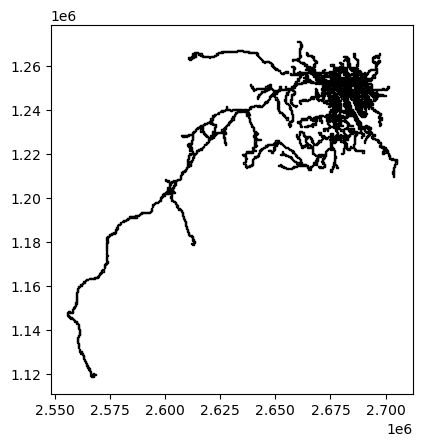

In [19]:
test.plot(facecolor="none", edgecolor="black")

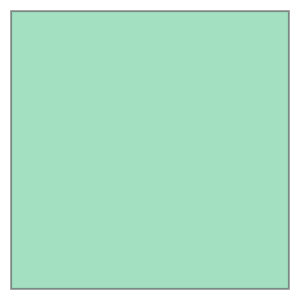

In [18]:
test.iloc[0].geometry

<AxesSubplot: >

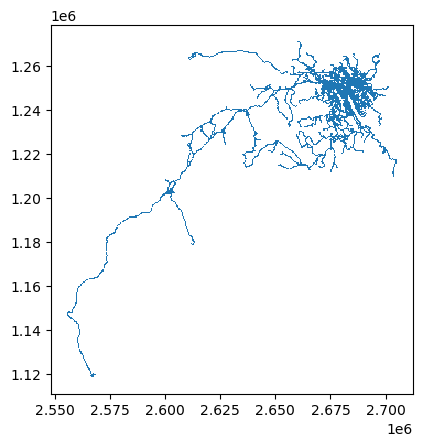

In [10]:
test.plot()

# Descobrim que passa amb nan a successive avg

In [1]:
import pandas as pd
import numpy as np
import os
import copy

In [11]:
output_directory = '/Users/francescmartiescofet/Documents/ETH/IVT/eqasim-java/switzerland/SA_scenario_v2'
last_iter = 5

In [12]:
drt_legs = []
global_avg = []
global_moving_avg = []
global_successive_avg = []
zonal_avg = []
zonal_moving_avg = []
zonal_successive_avg = []
rejections = []
for i in range(last_iter + 1):
    iter_path = os.path.join(output_directory,'testDrtZones','ITERS','it.' + str(i)) + \
                '/' + str(i) + '.'
    global_avg.append(pd.read_csv(iter_path + 'DrtWaitTimeGlobalAvg.csv', sep=';'))
    global_moving_avg.append(pd.read_csv(iter_path + 'DrtWaitTimeGlobalMovingAvg.csv', sep=';'))
    global_successive_avg.append(pd.read_csv(iter_path + 'DrtWaitTimeGlobalSuccessiveAvg.csv', sep=';'))
    zonal_avg.append(pd.read_csv(iter_path + 'DrtWaitTimesZonalAvg.csv', sep=';'))
    zonal_moving_avg.append(pd.read_csv(iter_path + 'DrtWaitTimesZonalMovingAvg.csv', sep=';'))
    zonal_successive_avg.append(pd.read_csv(iter_path + 'DrtWaitTimesZonalSuccessiveAvg.csv', sep=';'))
    drt_legs.append(pd.read_csv(iter_path + 'drt_legs_drt.csv', sep=';'))
    rejections.append(pd.read_csv(iter_path + 'drt_rejections_drt.csv', sep=';'))

link2zones_csv = pd.read_csv(os.path.join(output_directory,'testDrtZones','drt_WayneCountyLink2Zones.csv'), sep=';')
link2zones_csv = link2zones_csv.set_index('link_id')

In [13]:
link2zones = {}
for link_id, zone in link2zones_csv.iterrows():
    link2zones[link_id] = zone.zone.item()

In [14]:
def impute_zones_and_bins_rejections(it_drt_legs, link2zones, time_bins = 30):
    copied_legs = it_drt_legs.copy()
    hour_bins = [i*3600 for i in range(0,time_bins+1)]
    copied_legs['time_bin'] = pd.cut(copied_legs.time, hour_bins).map(lambda x: int(x.left/3600))
    copied_legs['zone'] = copied_legs['fromLinkId'].map(link2zones)
    
    return copied_legs

In [15]:
def impute_zones_and_bins(it_drt_legs, link2zones, time_bins = 30):
    copied_legs = it_drt_legs.copy()
    hour_bins = [i*3600 for i in range(0,time_bins+1)]
    copied_legs['time_bin'] = pd.cut(copied_legs.departureTime, hour_bins).map(lambda x: int(x.left/3600))
    copied_legs['zone'] = copied_legs['fromLinkId'].map(link2zones)
    
    return copied_legs

In [10]:
for i in range(1,5):
    it_drt_legs = impute_zones_and_bins_rejections(rejections[i].copy(), link2zones,24)
    display(it_drt_legs[it_drt_legs['zone'] == 112589])

,time,personId,fromLinkId,toLinkId,fromX,fromY,toX,toY,time_bin,zone
9,65505.0,201740003190290,1027244,63569,2.681997e+06,1.246958e+06,2.688243e+06,1.248037e+06,18,112589


,time,personId,fromLinkId,toLinkId,fromX,fromY,toX,toY,time_bin,zone
7,65505.0,201740003190290,1027244,63569,2.681997e+06,1.246958e+06,2.688243e+06,1.248037e+06,18,112589


,time,personId,fromLinkId,toLinkId,fromX,fromY,toX,toY,time_bin,zone
45,65505.0,201740003190290,1027244,63569,2.681997e+06,1.246958e+06,2.688243e+06,1.248037e+06,18,112589


,time,personId,fromLinkId,toLinkId,fromX,fromY,toX,toY,time_bin,zone
17,65505.0,201740003190290,1027244,63569,2.681997e+06,1.246958e+06,2.688243e+06,1.248037e+06,18,112589


In [11]:
for i in range(1,5):
    it_drt_legs = impute_zones_and_bins(drt_legs[i].copy(), link2zones,24)
    display(it_drt_legs[it_drt_legs['zone'] == 110820])

,departureTime,personId,vehicleId,fromLinkId,fromX,fromY,toLinkId,toX,toY,waitTime,arrivalTime,travelTime,travelDistance_m,directTravelDistance_m,fareForLeg,latestDepartureTime,latestArrivalTime,time_bin,zone
17,54174.0,201740003319381,drt1453,1065491,2680419.51,1250017.83,175953,2680557.98,1250298.27,61.0,54482.0,247.0,1950.83,1950.83,0,54774,54721.98,15,110820


,departureTime,personId,vehicleId,fromLinkId,fromX,fromY,toLinkId,toX,toY,waitTime,arrivalTime,travelTime,travelDistance_m,directTravelDistance_m,fareForLeg,latestDepartureTime,latestArrivalTime,time_bin,zone
26,54174.0,201740003319381,drt1453,1065491,2680419.51,1250017.83,175953,2680557.98,1250298.27,61.0,54482.0,247.0,1950.83,1950.83,0,54774,54725.1,15,110820


,departureTime,personId,vehicleId,fromLinkId,fromX,fromY,toLinkId,toX,toY,waitTime,arrivalTime,travelTime,travelDistance_m,directTravelDistance_m,fareForLeg,latestDepartureTime,latestArrivalTime,time_bin,zone
35,54174.0,201740003319381,drt1453,1065491,2680419.51,1250017.83,175953,2680557.98,1250298.27,61.0,54482.0,247.0,1950.83,1950.83,0,54774,54728.07,15,110820


,departureTime,personId,vehicleId,fromLinkId,fromX,fromY,toLinkId,toX,toY,waitTime,arrivalTime,travelTime,travelDistance_m,directTravelDistance_m,fareForLeg,latestDepartureTime,latestArrivalTime,time_bin,zone
51,54174.0,201740003319381,drt1453,1065491,2680419.51,1250017.83,175953,2680557.98,1250298.27,61.0,54482.0,247.0,1950.83,1950.83,0,54774,54730.89,15,110820


In [16]:
list_of_non_nan = []
for i in range(0,6):
    list_of_non_nan.append(list(zonal_successive_avg[i].set_index('zone')[zonal_successive_avg[i].set_index('zone').notnull()].stack().index))

In [17]:
len(list_of_non_nan[5])

96

In [18]:
zonal_successive_avg[5].set_index('zone').notnull().sum().sum()

96

In [19]:
for i in range(1,5):
    for j in list_of_non_nan[i]:
        if j not in list_of_non_nan[i+1]:
            print(i,j)

In [20]:
for i in range(1,6):
    it_drt_legs = impute_zones_and_bins(drt_legs[i].copy(), link2zones,24)
    display(it_drt_legs[it_drt_legs['zone'] == 109051])

,departureTime,personId,vehicleId,fromLinkId,fromX,fromY,toLinkId,toX,toY,waitTime,arrivalTime,travelTime,travelDistance_m,directTravelDistance_m,fareForLeg,latestDepartureTime,latestArrivalTime,time_bin,zone


,departureTime,personId,vehicleId,fromLinkId,fromX,fromY,toLinkId,toX,toY,waitTime,arrivalTime,travelTime,travelDistance_m,directTravelDistance_m,fareForLeg,latestDepartureTime,latestArrivalTime,time_bin,zone
9,30443.0,201740003001967,drt1209,234504,2677966.41,1253642.79,813607,2677587.77,1254120.81,88.0,30670.0,139.0,1044.86,1044.86,0,31043,30840.70,8,109051
21,44059.0,201740003001967,drt1209,451988,2678116.45,1253786.10,234504,2677966.41,1253642.79,61.0,44315.0,195.0,1308.77,1308.77,0,44659,44546.13,12,109051


,departureTime,personId,vehicleId,fromLinkId,fromX,fromY,toLinkId,toX,toY,waitTime,arrivalTime,travelTime,travelDistance_m,directTravelDistance_m,fareForLeg,latestDepartureTime,latestArrivalTime,time_bin,zone
15,30443.0,201740003001967,drt1209,234504,2677966.41,1253642.79,813607,2677587.77,1254120.81,88.0,30670.0,139.0,1044.86,1044.86,0,31043,30842.92,8,109051
34,52943.0,201740003001967,drt1362,234504,2677966.41,1253642.79,937812,2678116.89,1253495.80,88.0,53070.0,39.0,278.84,278.84,0,53543,53236.67,14,109051


,departureTime,personId,vehicleId,fromLinkId,fromX,fromY,toLinkId,toX,toY,waitTime,arrivalTime,travelTime,travelDistance_m,directTravelDistance_m,fareForLeg,latestDepartureTime,latestArrivalTime,time_bin,zone
20,30443.0,201740003001967,drt1209,234504,2677966.41,1253642.79,813607,2677587.77,1254120.81,88.0,30670.0,139.0,1044.86,1044.86,0,31043,30845.04,8,109051
50,52943.0,201740003001967,drt1362,234504,2677966.41,1253642.79,937812,2678116.89,1253495.80,88.0,53070.0,39.0,278.84,278.84,0,53543,53236.84,14,109051


,departureTime,personId,vehicleId,fromLinkId,fromX,fromY,toLinkId,toX,toY,waitTime,arrivalTime,travelTime,travelDistance_m,directTravelDistance_m,fareForLeg,latestDepartureTime,latestArrivalTime,time_bin,zone
23,30443.0,201740003001967,drt1209,234504,2677966.41,1253642.79,813607,2677587.77,1254120.81,88.0,30670.0,139.0,1044.86,1044.86,0,31043,30847.04,8,109051
48,44059.0,201740003001967,drt1209,451988,2678116.45,1253786.10,234504,2677966.41,1253642.79,61.0,44315.0,195.0,1308.77,1308.77,0,44659,44547.37,12,109051


Comporvar pk hi ha rows on tot son nans -> també en el avg normal

In [24]:
pd.set_option('display.max_columns', 100)

for i in range(1,6):
    display(zonal_successive_avg[i][zonal_successive_avg[i].zone == 109051])

,zone,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23


,zone,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
9,109051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,zone,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
10,109051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,61.0,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,zone,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
36,109051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,61.0,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,zone,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
42,109051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,61.0,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
